In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats
import statsmodels

In [1]:
from termcolor import colored

In [2]:
print(colored('hello', 'red'), colored('world', 'green'))
print(colored("hello red world", 'red'))

hello world
hello red world


## Алгоритм проверки статистических гипотез

- постановка задачи
    - Сформулировать, что мы хотим узнать о выборках с точки зрения бизнес задачи (равны ли средние доходы в группах)

- формулировка гипотез
    - перевод бизнес-вопроса на язык статистики: средний доход в группах - проверка равенства средних значений
    - формулировка нулевой гипотезы - с т.зр. равенства стат прараметров оцениваемых выборок (Н0: Средние траты клиентов по группе А равны средним тратам клинентов по группе В)
    - формулировка альтернативной гипотезы - с точки зрения неравенства параметров (Н1: Средние траты клиентов по группе А не равны средним тратам клинентов по группе В)

- выбор критерия alpha (почему 0.05 или 0.01)
    - цена ошибки первого рода (при большой цене ошибки - в мед исследованиях, потенциальном ущербе ) - значение может быть больше, например 0.1
    - в ежедневных бизнес задачах, обычно - 0.05

- анализ распределения
    - визуальная оценка
    - следим за выбросами
    - проверка гипотез о типе распредеделения (например критерий Шапиро-Уилка)
    - если распределение не нормальное и размер выборки достаточный (больше 30-50 элементов) может быть использован t-test именно для проверки гипотезы о равенстве средних. Согласно ЦПТ (центральная предельная теорема) средние этих выборок будут распределены нормально. См. статью Зотова

- выбор критерия
    - при оценке равенства средних T-test

- получение результата
    - расчет p-value

- интерпретация p-value
    - сравнение p-value и alpha
    - если альфа > p-value - отвергаем нулевую гипотезу
    - если альфа < p-value - не можем отвергнуть нулевую гипотезу

## Генерируем данные

In [43]:
#np.random.normal(mu - мат ожидание, sigma - стандартное отклонение, N - объем выборки)
a = np.random.normal(35, 22, 9000)
b = np.random.normal(30, 22, 10000)

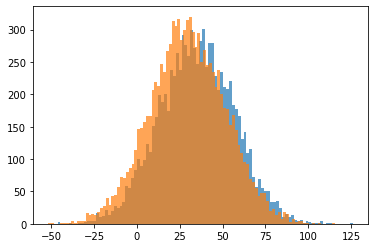

In [44]:
plt.hist(a, alpha=0.7, bins=100)
plt.hist(b, alpha=0.7, bins=100)
plt.show()

## Проверяем абстрактный пример

H0: Среднее выборки a равно среднему выборки b
<br>H1: Среднее выборки а не равно среднему выборки b

In [6]:
a = np.random.normal(25, 15, 1000)
b = np.random.normal(28, 15.6, 1000)

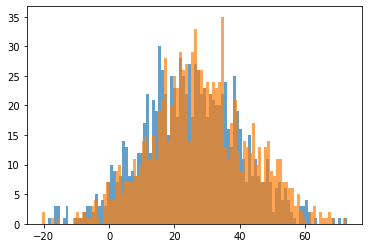

In [7]:
plt.hist(a, alpha=0.7, bins=100)
plt.hist(b, alpha=0.7, bins=100)
plt.show()

In [8]:
scipy.stats.ttest_ind(a, b, equal_var=False)

Ttest_indResult(statistic=-4.299043410654094, pvalue=1.7979118687733868e-05)

Что это значит?

In [45]:
?scipy.stats.ttest_ind

Чтобы p-value не смущало:

In [10]:
alpha = 0.05
results = scipy.stats.ttest_ind(a, b, equal_var=False)

# Проверка гипотез о равенстве средних
if (results.pvalue < alpha):
    print(colored("Отвергаем нулевую гипотезу", 'red'), f'pvalue: {results.pvalue}', f'alpha: {alpha}')
    print()
else:
    print(colored("Не можем отвергнуть нулевую гипотезу", 'green') , f'pvalue: {results.pvalue}', f'alpha: {alpha}')
    print()

Отвергаем нулевую гипотезу pvalue: 1.7979118687733868e-05 alpha: 0.05



### Функция

Пример автоматизации:

In [11]:
def equal_means(a,b, data, equal_var = False, alpha = 0.05, number=1):
    # Описание выборок
    print(f"Выборка А: среднее:{data[number]['a'][0]}, размах: {data[number]['a'][1]}, размер выборки: {data[number]['a'][2]}")
    print(f"Выборка B: среднее: {data[number]['b'][0]}, размах: {data[number]['b'][1]}, размер выборки: {data[number]['b'][2]}")
    # Генерация выборок
    a = np.random.normal(data[number]['a'][0], data[number]['a'][1], data[number]['a'][2])
    b = np.random.normal(data[number]['b'][0], data[number]['b'][1], data[number]['b'][2])
    # Расчет параметров из коробки
    results = scipy.stats.ttest_ind(a, b, equal_var=equal_var)
    
    print(f'из коробки - {results}')
    # Построение гистограмм для визуальной оценки распределений
    plt.hist(a, alpha=0.7, bins=100)
    plt.hist(b, alpha=0.7, bins=100)
    plt.show()
    # Проверка гипотез о равенстве средних
    if (results.pvalue < alpha):
        print(colored("Отвергаем нулевую гипотезу", 'red'), f'pvalue: {results.pvalue}', f'alpha: {alpha}')
        print()
    else:
        print(colored("Не можем отвергнуть нулевую гипотезу", 'green') , f'pvalue: {results.pvalue}', f'alpha: {alpha}')
        print()

### Параметры выборок
- среднее
- размах
- размер выборки
    

In [46]:
data = {
1: {
    'a':(26, 30, 6000),
    'b':(27, 31, 6000)
    },
2: {
    'a':(25, 22, 9000),
    'b':(30, 22, 9500)
    },
3: {
    'a':(26, 30, 1000),
    'b':(27, 31, 1000)
},
4: {
    'a':(64, 60, 10000),
    'b':(65, 60, 10000)
}
}

НОМЕР ПРИМЕРА ВЫБОРОК: 1
Выборка А: среднее:26, размах: 30, размер выборки: 6000
Выборка B: среднее: 27, размах: 31, размер выборки: 6000
из коробки - Ttest_indResult(statistic=-1.6013399850019303, pvalue=0.10932797763224904)


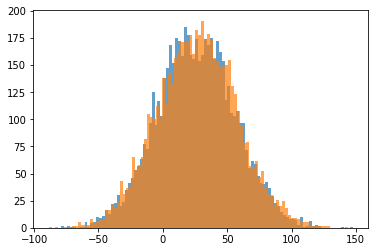

Не можем отвергнуть нулевую гипотезу pvalue: 0.10932797763224904 alpha: 0.05

НОМЕР ПРИМЕРА ВЫБОРОК: 2
Выборка А: среднее:25, размах: 22, размер выборки: 9000
Выборка B: среднее: 30, размах: 22, размер выборки: 9500
из коробки - Ttest_indResult(statistic=-17.89081154675845, pvalue=5.535158153295795e-71)


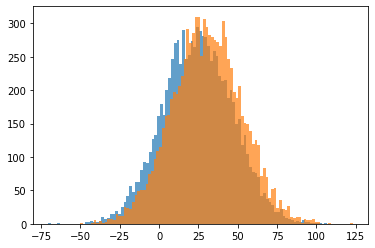

Отвергаем нулевую гипотезу pvalue: 5.535158153295795e-71 alpha: 0.05

НОМЕР ПРИМЕРА ВЫБОРОК: 3
Выборка А: среднее:26, размах: 30, размер выборки: 1000
Выборка B: среднее: 27, размах: 31, размер выборки: 1000
из коробки - Ttest_indResult(statistic=-1.043947081785328, pvalue=0.2966366552723028)


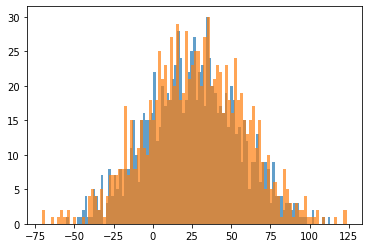

Не можем отвергнуть нулевую гипотезу pvalue: 0.2966366552723028 alpha: 0.05

НОМЕР ПРИМЕРА ВЫБОРОК: 4
Выборка А: среднее:64, размах: 60, размер выборки: 10000
Выборка B: среднее: 65, размах: 60, размер выборки: 10000
из коробки - Ttest_indResult(statistic=-0.3719742724634113, pvalue=0.7099159463840767)


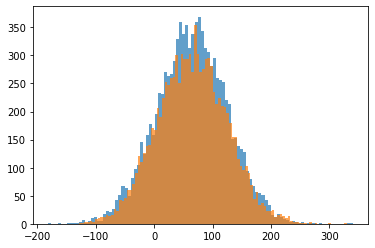

Не можем отвергнуть нулевую гипотезу pvalue: 0.7099159463840767 alpha: 0.05



In [47]:
for number in range(1,len(data)+1):
    print(f'номер примера выборок: {number}'.upper())
    equal_means(a,b, data, equal_var = False, alpha = 0.05, number=number)

Попробуем другие параметры (посмотрите, что меняется при изменении разницы между средними, росте дисперсии, росте N)

## Проверяем равенство конверсий

Реализация "из коробки":

In [2]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
converted = np.array([5, 12])
nobs = np.array([83, 99])
stat, pval = proportions_ztest(converted, nobs)
# print('{0:0.3f}'.format(pval))
stat,pval

(-1.4078304151258787, 0.15918129181156992)

Реализация Z-теста руками:

In [9]:
scipy.stats.norm.cdf(1.96)

0.9750021048517795

In [15]:
def two_sample_binomial_test(p1, N1, p2, N2):
    p = (N1*p1+N2*p2)/(N1+N2)
    Z = np.sqrt(N1 * N2 / (N1 + N2)) * (p1 - p2) / np.sqrt(p * (1 - p))
    p_value = 2 * scipy.stats.norm.sf(abs(Z))
    return Z, p_value

In [16]:
print(two_sample_binomial_test(5/83, 83, 12/99, 99), proportions_ztest(converted, nobs))

(-1.4078304151258785, 0.15918129181157015) (-1.4078304151258787, 0.15918129181156992)


Почитать про z-test можно почитать на английской википедии

# Часть2
## Merge & join

### Формируем тренировочные датасеты


In [48]:
cl = pd.DataFrame({ 'id': ['11', '12', '13', '14', '15'],
                    'city': ['Moscow', 'moscow', 'spb', 'moscow', 'SPB'],
                    'gender': ['m', 'f', 'f', 'M', 'F']})

ord = pd.DataFrame({'id': ['001', '002', '003', '004', '005', '006', '007', '008'],
                     'cl_id': ['12', '16', '13', '12', '14', '10', '12', '13'],
                     'price': ['400', '200', '300', '150', '100', '200', '300', '150'],
                     'discount': ['0.01', '0', '0.05', '0', '0', '0.01', '0', '0'],
                     'status': ['order', 'deliver', 'done', 'cansel', '', 'order', 'deliver', 'done']})


In [18]:
cl

,id,city,gender
0,11,Moscow,m
1,12,moscow,f
2,13,spb,f
3,14,moscow,M
4,15,SPB,F


In [19]:
ord

,id,cl_id,price,discount,status
0,001,12,400,0.01,order
1,002,16,200,0,deliver
2,003,13,300,0.05,done
3,004,12,150,0,cansel
4,005,14,100,0,
5,006,10,200,0.01,order
6,007,12,300,0,deliver
7,008,13,150,0,done


In [20]:
cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
id        5 non-null object
city      5 non-null object
gender    5 non-null object
dtypes: object(3)
memory usage: 248.0+ bytes


In [21]:
ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
id          8 non-null object
cl_id       8 non-null object
price       8 non-null object
discount    8 non-null object
status      8 non-null object
dtypes: object(5)
memory usage: 448.0+ bytes


### Приводим столбцы к нужному типу

В каждой из табличек проверяем, что все столбцы имеют тот тип, который мы ожидаем, и в случае, если это не так, приводим к нужному типу.

In [22]:
# Меняем на нижний регистр
for column_name in ["city", "gender"]:
    cl[column_name] = cl[column_name].str.lower()

In [23]:
cl

,id,city,gender
0,11,moscow,m
1,12,moscow,f
2,13,spb,f
3,14,moscow,m
4,15,spb,f


In [24]:
convert_dict = {"price": float,
                "discount": float} 
  
ord = ord.astype(convert_dict) 

# проверяем, нет ли пропусков, какие разделители. пропуски нужно заменить нулями

In [25]:
ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
id          8 non-null object
cl_id       8 non-null object
price       8 non-null float64
discount    8 non-null float64
status      8 non-null object
dtypes: float64(2), object(3)
memory usage: 448.0+ bytes


### Join или Merge

### Объединяем основную таблицу ord и cl
1. Понять, каким образом мы хотим сделать объединение (left, inner, outer)
2. Выбрать метод, которым мы будем объединять
3. После любого объединения нужно всегда проверять, что количество строк в итоговой таблице ровно такое, как мы ожидаем

###### Вспоминаем объем датасета

In [26]:
ord.shape

(8, 5)

In [27]:
ord.describe()

,price,discount
count,8.0,8.000000
mean,225.0,0.008750
std,100.0,0.017269
min,100.0,0.000000
25%,150.0,0.000000
50%,200.0,0.000000
75%,300.0,0.010000
max,400.0,0.050000


In [28]:
ord.sum()

id                        001002003004005006007008
cl_id                             1216131214101213
price                                         1800
discount                                      0.07
status      orderdeliverdonecanselorderdeliverdone
dtype: object

###### объединяем по ключу клиента

In [29]:
data = ord.merge(cl, left_on="cl_id", right_on="id")
data

,id_x,cl_id,price,discount,status,id_y,city,gender
0,001,12,400.0,0.01,order,12,moscow,f
1,004,12,150.0,0.00,cansel,12,moscow,f
2,007,12,300.0,0.00,deliver,12,moscow,f
3,003,13,300.0,0.05,done,13,spb,f
4,008,13,150.0,0.00,done,13,spb,f
5,005,14,100.0,0.00,,14,moscow,m


###### Потеряли часть заказов

`how{‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’`


###### Попробуем `outer`

In [30]:
# объединяем по ключу клиента, outer

data = ord.merge(cl, left_on="cl_id", right_on="id", how = 'outer')
data

,id_x,cl_id,price,discount,status,id_y,city,gender
0,001,12,400.0,0.01,order,12,moscow,f
1,004,12,150.0,0.00,cansel,12,moscow,f
2,007,12,300.0,0.00,deliver,12,moscow,f
3,002,16,200.0,0.00,deliver,NaN,NaN,NaN
4,003,13,300.0,0.05,done,13,spb,f
5,008,13,150.0,0.00,done,13,spb,f
6,005,14,100.0,0.00,,14,moscow,m
7,006,10,200.0,0.01,order,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,11,moscow,m
9,NaN,NaN,NaN,NaN,NaN,15,spb,f


###### заказы на месте, но добавились лишние клиенты

###### Пробуем `left`

In [31]:
# объединяем по ключу клиента, left

data = ord.merge(cl, left_on="cl_id", right_on="id", how = 'left')
data

,id_x,cl_id,price,discount,status,id_y,city,gender
0,001,12,400.0,0.01,order,12,moscow,f
1,002,16,200.0,0.00,deliver,NaN,NaN,NaN
2,003,13,300.0,0.05,done,13,spb,f
3,004,12,150.0,0.00,cansel,12,moscow,f
4,005,14,100.0,0.00,,14,moscow,m
5,006,10,200.0,0.01,order,NaN,NaN,NaN
6,007,12,300.0,0.00,deliver,12,moscow,f
7,008,13,150.0,0.00,done,13,spb,f


###### Теперь все заказы на меесте, мы обогатили датасет информацией о клиентах

### Как растут датасеты

In [32]:
cl.shape

(5, 3)

In [33]:
cl = cl.merge(ord, left_on="id", right_on="cl_id", how = 'outer')
cl

,id_x,city,gender,id_y,cl_id,price,discount,status
0,11,moscow,m,NaN,NaN,NaN,NaN,NaN
1,12,moscow,f,001,12,400.0,0.01,order
2,12,moscow,f,004,12,150.0,0.00,cansel
3,12,moscow,f,007,12,300.0,0.00,deliver
4,13,spb,f,003,13,300.0,0.05,done
5,13,spb,f,008,13,150.0,0.00,done
6,14,moscow,m,005,14,100.0,0.00,
7,15,spb,f,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,002,16,200.0,0.00,deliver
9,NaN,NaN,NaN,006,10,200.0,0.01,order


In [34]:
cl.shape

(10, 8)

1. Агрегируй, потом объединяй
2. Сохраняй исходные данные
3. Проверяй итог



In [35]:
ord_group = ord.groupby('cl_id').agg({"discount": "max", "price": "sum"})
ord_group

,discount,price
cl_id,,
10,0.01,200.0
12,0.01,850.0
13,0.05,450.0
14,0.00,100.0
16,0.00,200.0


In [49]:
data = cl.merge(ord_group, left_on="id", right_on="cl_id", how = 'left')
data

,id,city,gender,discount,price
0,11,Moscow,m,NaN,NaN
1,12,moscow,f,0.01,850.0
2,13,spb,f,0.05,450.0
3,14,moscow,M,0.00,100.0
4,15,SPB,F,NaN,NaN


###### Теперь по каждому клиенту понятна сумма покупки и максимальная скидка

## Еще варианты объединения

### concat
### append
